In [50]:
%pip install torch torchvision pandas numpy matplotlib pillow seaborn scikit-learn opencv-python
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import xml.etree.ElementTree as ET
import seaborn as sns
from skimage import io
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

Define dataset paths and load df of parsed xml from class imageRead

In [53]:
dataset_pth = 'C:/MAMP/htdocs/2025_GP_27/model1/newDataset_images'
annotations_pth = 'C:/MAMP/htdocs/2025_GP_27/model1/annotations'
image_files = sorted([f for f in os.listdir(dataset_pth) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))])
xml_files = sorted([f for f in os.listdir(annotations_pth) if f.lower().endswith('.xml')])
%store -r df


In [54]:
%pip install nbformat


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


to load any method or variable from class imageRead

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Stored 'df' (DataFrame)
Created DataFrame with 3231 samples
Checking for inconsistencies, missing files, and data issues...

CHECKING IMAGE-XML CORRESPONDENCE:
   Checked 0/3231 files...
   Checked 500/3231 files...
   Checked 1000/3231 files...
   Checked 1500/3231 files...
   Checked 2000/3231 files...
   Checked 2500/3231 files...
   Checked 3000/3231 files...
Finished checking 3231 xml files.
Missing images: 316, XML parse errors: 0, issues_found: 316
The missing images are: [('normal_pressure_1.xml', '136.png'), ('normal_pressure_10.xml', '145.png'), ('normal_pressure_100.xml', '235.png'), ('normal_pressure_101.xml', '236.png'), ('normal_pressure_102.xml', '237.png'), ('normal_pressure_103.xml', '238.png'), ('normal_pressure_104.xml', '239.png'), ('normal_pressure_105.xml', '240.png'), ('normal_pressure_106.xml', '241.png'), ('normal_pressure_107.xml', '242.png'), ('normal_pressure_108.xml', '243.png'), ('normal_pressure_109.xml', '244.png'), ('normal_pressure_11.xml', '146.png'),

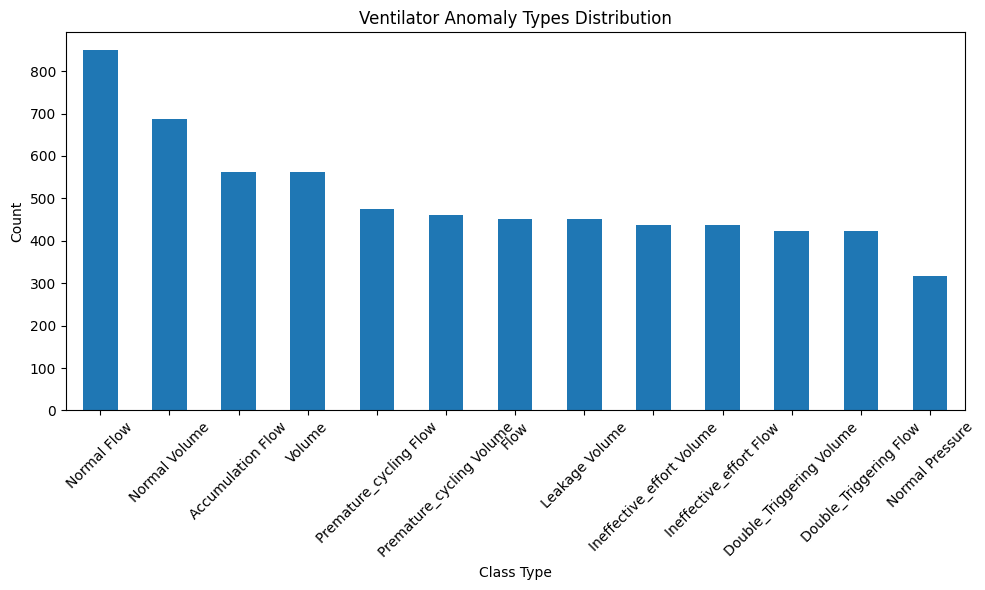

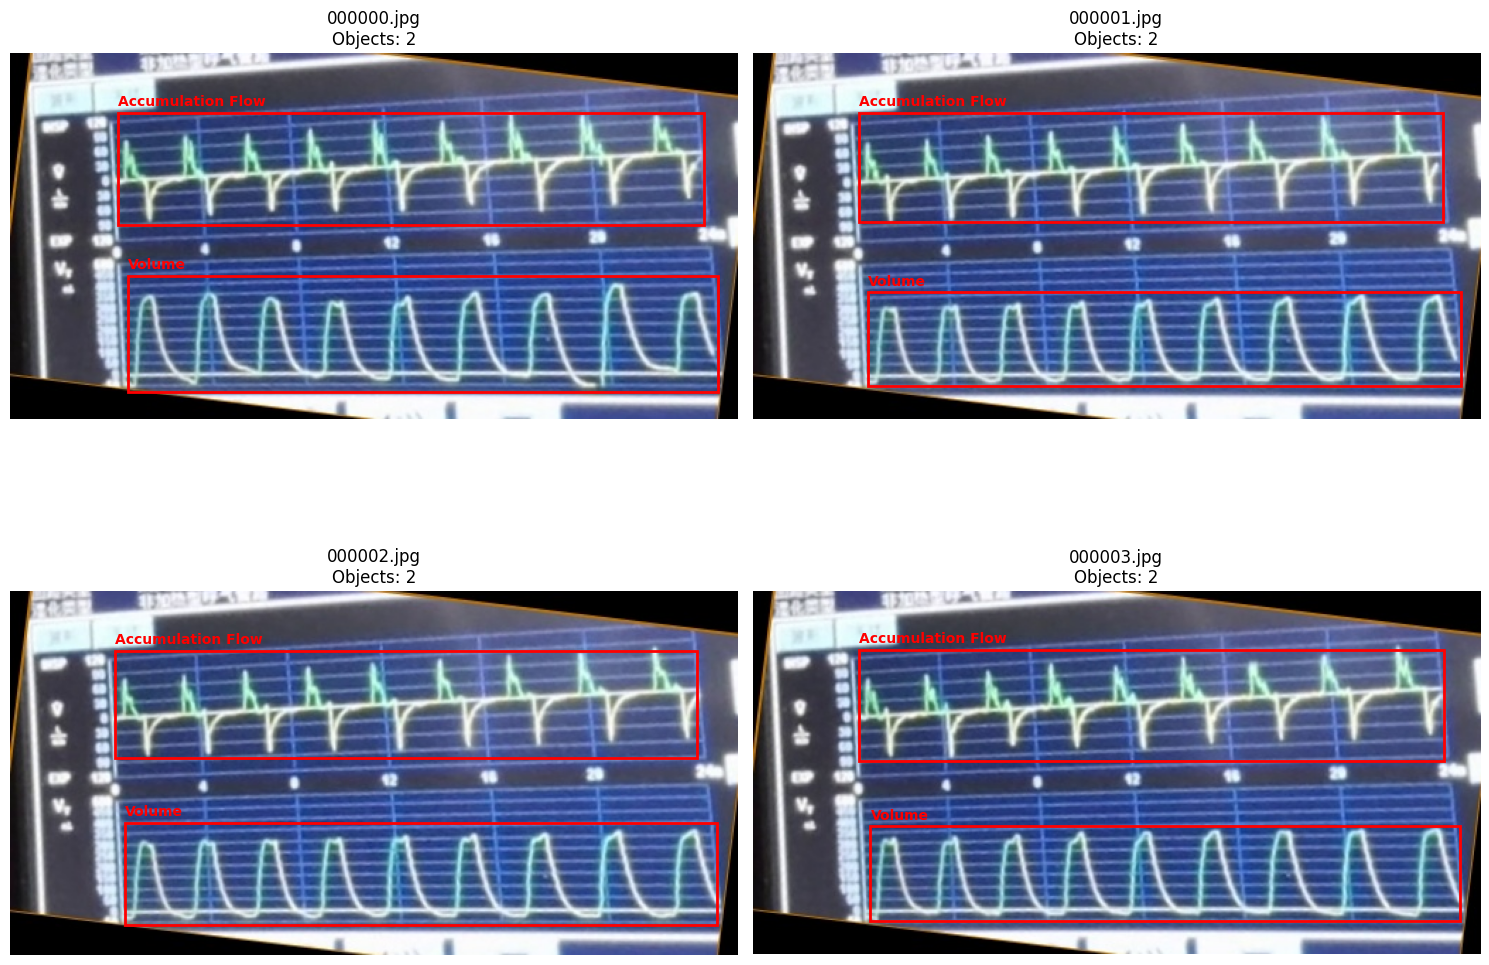

=== TESTING DIFFERENT BACKGROUND REGIONS ===
top_left: STD = 64.06, Mean = 191.16
Region: top_left, Noise STD: 64.05723889897222
top_right: STD = 55.87, Mean = 72.50
Region: top_right, Noise STD: 55.874706257482906
bottom_left: STD = 53.49, Mean = 54.75
Region: bottom_left, Noise STD: 53.48695243365432
bottom_right: STD = 57.67, Mean = 124.85
Region: bottom_right, Noise STD: 57.6729907197468
center_top: STD = 23.02, Mean = 84.30
Region: center_top, Noise STD: 23.024968707904907

=== NOISE ASSESSMENT ===
000000.jpg: Very Noisy (STD: 31.2) - Denoise: True
000001.jpg: Very Noisy (STD: 30.9) - Denoise: True
000002.jpg: Very Noisy (STD: 30.9) - Denoise: True
000003.jpg: Very Noisy (STD: 31.6) - Denoise: True
000004.jpg: Very Noisy (STD: 31.3) - Denoise: True
000005.jpg: Very Noisy (STD: 27.1) - Denoise: True
000006.jpg: Very Noisy (STD: 30.9) - Denoise: True
000007.jpg: Very Noisy (STD: 30.9) - Denoise: True
000008.jpg: Very Noisy (STD: 29.4) - Denoise: True
000009.jpg: Very Noisy (STD: 31.

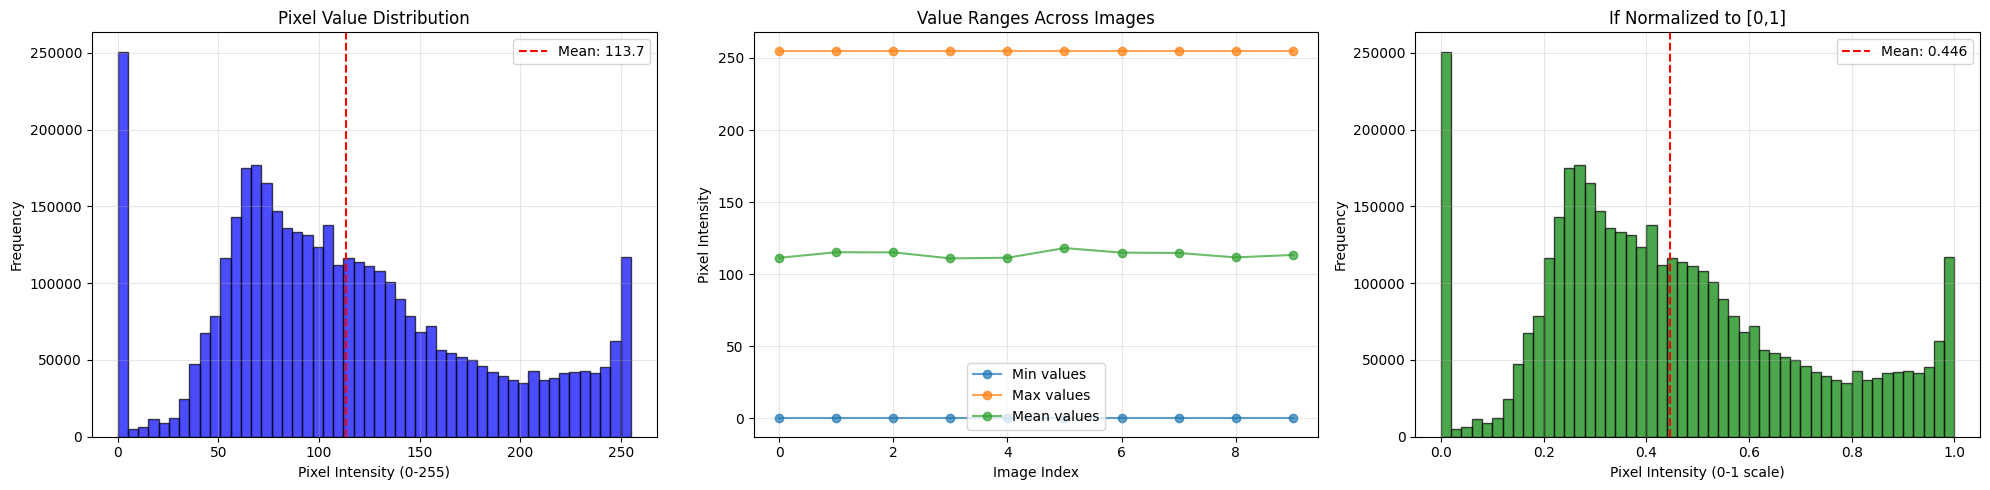

=== NORMALIZATION STATUS ANALYSIS ===
Data appears to be on scale: 
  [0, 255] scale: True
  [0, 1] scale: False
  [-1, 1] scale: False
CONCLUSION: Data is in standard 0-255 range
   Normalization to [0,1] is REQUIRED for ML models
Analyzing image quality for sample images...

Image Quality Summary:
     filename        size  mean_intensity  contrast  noise_std
0  000000.jpg  (514, 259)      105.300340       255  46.555255
1  000001.jpg  (515, 259)      108.953436       255  44.678550
2  000002.jpg  (515, 258)      108.875728       255  44.819154
3  000003.jpg  (515, 257)      104.786461       255  46.555382
4  000004.jpg  (516, 258)      105.304714       255  47.218437
5  000005.jpg  (517, 258)      111.505803       255  46.367310
6  000006.jpg  (515, 258)      108.640250       255  44.297107
7  000007.jpg  (516, 258)      108.448027       254  45.161165
8  000008.jpg  (517, 260)      105.622080       255  44.997835
9  000009.jpg  (513, 259)      107.323609       255  44.668624


In [55]:
%run imageRead.ipynb

In [56]:
#Ensure df is loaded
print("DataFrame loaded with", len(df), "rows")

DataFrame loaded with 3231 rows


Clean df from filenames, build full image paths, remove missing files

In [57]:
df['image_name'] = df['image_name'].astype(str)
df['image_name'] = df['image_name'].str.replace('\t', '', regex=False)
df['image_name'] = df['image_name'].str.strip()

df['image_path'] = df['image_name'].apply(lambda x: os.path.join(dataset_pth, x))

print("Sample image names and paths:")
print(df[['image_name', 'image_path']].head())

# Find annotations with missing image files
missing = df[~df['image_path'].apply(os.path.exists)]
print("Number of missing image files:", len(missing))

if len(missing) > 0:
    print("Example of missing files:")
    print(missing[['image_name', 'image_path']].head())

df = df[df['image_path'].apply(os.path.exists)].reset_index(drop=True)
print("After removing missing images, total rows:", len(df))

missing_after = df[~df['image_path'].apply(os.path.exists)]
print("After cleaning, missing files:", len(missing_after))


Sample image names and paths:
   image_name                                         image_path
0  000000.jpg  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
1  000001.jpg  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
2  000002.jpg  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
3  000003.jpg  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
4  000004.jpg  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
Number of missing image files: 316
Example of missing files:
     image_name                                         image_path
2915    136.png  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
2916    145.png  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
2917    235.png  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
2918    236.png  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
2919    237.png  C:/MAMP/htdocs/2025_GP_27/model1/newDataset_im...
After removing missing images, total rows: 2915
After cleaning, missing files: 0


Denoise Transform using Edge preserving

In [58]:
class DenoiseTransform:
    """
    Apply gentle, edge-preserving denoising using OpenCV fastNlMeansDenoisingColored.
    Input : PIL Image (RGB)
    Output: PIL Image (RGB) after noise reduction
    """
    def __call__(self, img_pil):
        # Convert PIL -> NumPy (RGB)
        img_np = np.array(img_pil)

        # OpenCV expects BGR, so convert if needed
        img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

        # Apply gentle denoising (small h values to avoid over-smoothing)
        denoised_bgr = cv2.fastNlMeansDenoisingColored(
            img_bgr,
            None,
            h=6,          # luminance filter strength
            hColor=6,     # color filter strength
            templateWindowSize=7,
            searchWindowSize=21
        )

        # Back to RGB
        denoised_rgb = cv2.cvtColor(denoised_bgr, cv2.COLOR_BGR2RGB)

        # Convert back to PIL
        return Image.fromarray(denoised_rgb)

Image: 000000.jpg


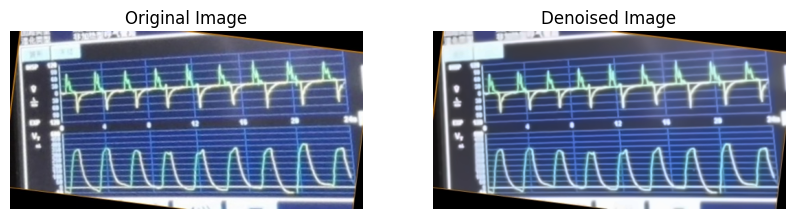

Image: 000001.jpg


Image: 000002.jpg


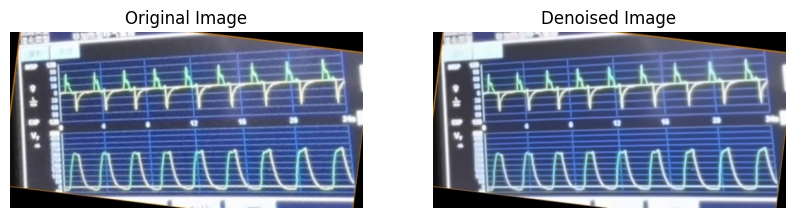

Image: 000003.jpg


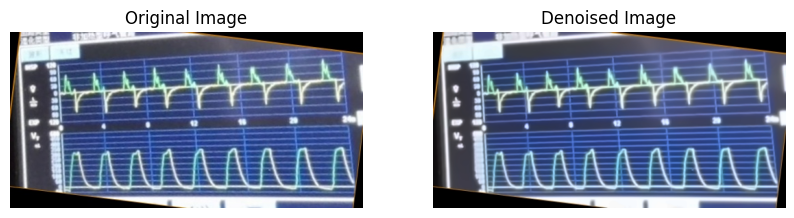

Image: 000004.jpg


In [59]:
for image_file in image_files[:5]:
    img_path = os.path.join(dataset_pth, image_file)
    row = df[df['image_name'] == image_file].iloc[0]
    denoise_transform = DenoiseTransform()
    original_img = Image.open(img_path).convert('RGB')
    denoised_img = denoise_transform(original_img)
    
    
    print(f"Image: {row['image_name']}")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(original_img)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title("Denoised Image")
    plt.imshow(denoised_img)
    plt.axis('off')
    plt.show()

Normalization of image data

In [60]:
print("=== NORMALIZATION PIXELS [0,1] ===")

for image_file in image_files[:2]:
    img_path = os.path.join(dataset_pth, image_file)
    image_pil = Image.open(img_path)
    image_array = np.array(image_pil)
 
    # normalization to [0,1] 
    normalized = image_array.astype(np.float32) / 255.0
    print(f"{image_file}:")
    print(f"   Original range: [{image_array.min()}, {image_array.max()}]")
    print(f"   After /255:     [{normalized.min():.3f}, {normalized.max():.3f}]")    
    print(f"   First pixel values:")
    print(f"   Original: {image_array[0,0,:]}")
    print(f"   After /255: {normalized[0,0,:]}")
    print()


=== NORMALIZATION PIXELS [0,1] ===
000000.jpg:
   Original range: [0, 255]
   After /255:     [0.000, 1.000]
   First pixel values:
   Original: [0 0 2]
   After /255: [0.         0.         0.00784314]

000001.jpg:
   Original range: [0, 255]
   After /255:     [0.000, 1.000]
   First pixel values:
   Original: [0 0 2]
   After /255: [0.         0.         0.00784314]



# label mapping

Define main anomaly classes and label IDs


In [61]:

MACRO_LABELS = [
    "Normal",
    "Accumulation",
    "Premature_cycling",
    "Leakage",
    "Ineffective_effort",
    "Double_Triggering",
]
NUM_CLASSES = len(MACRO_LABELS)
label_to_idx = {lab: i for i, lab in enumerate(MACRO_LABELS)}
idx_to_label = {i: lab for lab, i in label_to_idx.items()}

print("MACRO_LABELS:", MACRO_LABELS)
print("label_to_idx:", label_to_idx)



MACRO_LABELS: ['Normal', 'Accumulation', 'Premature_cycling', 'Leakage', 'Ineffective_effort', 'Double_Triggering']
label_to_idx: {'Normal': 0, 'Accumulation': 1, 'Premature_cycling': 2, 'Leakage': 3, 'Ineffective_effort': 4, 'Double_Triggering': 5}


Map raw XML classes to main labels and encode label IDs

In [70]:
def map_to_macro_label(raw_name: str):
    if raw_name is None:
        return None
    name = str(raw_name).strip()

    # 1) Normal 
    if name.startswith("Normal "):
        return "Normal"
    if name == "Normal Pressure":
        return "Normal"


    if name in ["Flow", "Volume"]:
        return None 

    # 2) Accumulation
    if name.startswith("Accumulation"):
        return "Accumulation"

    # 3) Premature_cycling
    if name.startswith("Premature_cycling"):
        return "Premature_cycling"

    # 4) Leakage
    if name.startswith("Leakage"):
        return "Leakage"

    # 5) Ineffective_effort
    if name.startswith("Ineffective_effort"):
        return "Ineffective_effort"

    # 6) Double_Triggering
    if name.startswith("Double_Triggering"):
        return "Double_Triggering"

    # Any other class is ignored for main-label classification
    return None


In [71]:

def encode_macro_label_id(row):
    present = set()

    for obj in row['objects']:
        raw_name = obj.get('class', None)
        macro = map_to_macro_label(raw_name)
        if macro is not None:
            present.add(macro)

    if len(present) != 1:
        return -1

    macro_label = list(present)[0]
    return label_to_idx[macro_label]

df['macro_label_id'] = df.apply(encode_macro_label_id, axis=1)

df_macro = df[df['macro_label_id'] >= 0].reset_index(drop=True)

print("Total samples after main-labeling:", len(df_macro))
print("Counts per main class:")
print(df_macro['macro_label_id'].value_counts().sort_index())
for i, c in enumerate(MACRO_LABELS):
    print(i, c)

Total samples after main-labeling: 2915
Counts per main class:
macro_label_id
0    564
1    562
2    476
3    452
4    438
5    423
Name: count, dtype: int64
0 Normal
1 Accumulation
2 Premature_cycling
3 Leakage
4 Ineffective_effort
5 Double_Triggering


Split dataset into train, validation, and test sets

In [72]:
from sklearn.model_selection import train_test_split

print("Total samples after macro-labeling:", len(df_macro))

train_df, temp_df = train_test_split(
    df_macro,
    test_size=0.3,           
    random_state=42,
    shuffle=True,
    stratify=df_macro['macro_label_id']   
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,             
    random_state=42,
    shuffle=True,
    stratify=temp_df['macro_label_id']
)

print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))
print("Train label counts:\n", train_df['macro_label_id'].value_counts().sort_index())
print("Val label counts:\n",   val_df['macro_label_id'].value_counts().sort_index())
print("Test label counts:\n",  test_df['macro_label_id'].value_counts().sort_index())


Total samples after macro-labeling: 2915
Train: 2040 Val: 437 Test: 438
Train label counts:
 macro_label_id
0    395
1    393
2    333
3    316
4    307
5    296
Name: count, dtype: int64
Val label counts:
 macro_label_id
0    84
1    84
2    71
3    68
4    66
5    64
Name: count, dtype: int64
Test label counts:
 macro_label_id
0    85
1    85
2    72
3    68
4    65
5    63
Name: count, dtype: int64


Define image transforms for training, validation, and testing

In [73]:
IMG_SIZE = 224  

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),  
    DenoiseTransform(),                       
    transforms.RandomHorizontalFlip(p=0.5),   
    transforms.RandomRotation(5),
    transforms.ToTensor(),                    
    transforms.Normalize(                    
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])

val_test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    DenoiseTransform(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])


Build custom PyTorch Dataset for TANAFS anomaly classification

In [74]:
class TanafsMacroDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = row['image_path']
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label_id = int(row['macro_label_id'])
        label = torch.tensor(label_id, dtype=torch.long)

        return image, label

BATCH_SIZE = 16

train_dataset = TanafsMacroDataset(train_df, transform=train_transform)
val_dataset   = TanafsMacroDataset(val_df,   transform=val_test_transform)
test_dataset  = TanafsMacroDataset(test_df,  transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,  num_workers=0)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

images, labels = next(iter(train_loader))
print("Images shape:", images.shape)   
print("Labels shape:", labels.shape)   
print("First 5 labels:", labels[:5])


Images shape: torch.Size([16, 3, 224, 224])
Labels shape: torch.Size([16])
First 5 labels: tensor([0, 1, 1, 5, 5])


Visualize a batch of training images with main class names

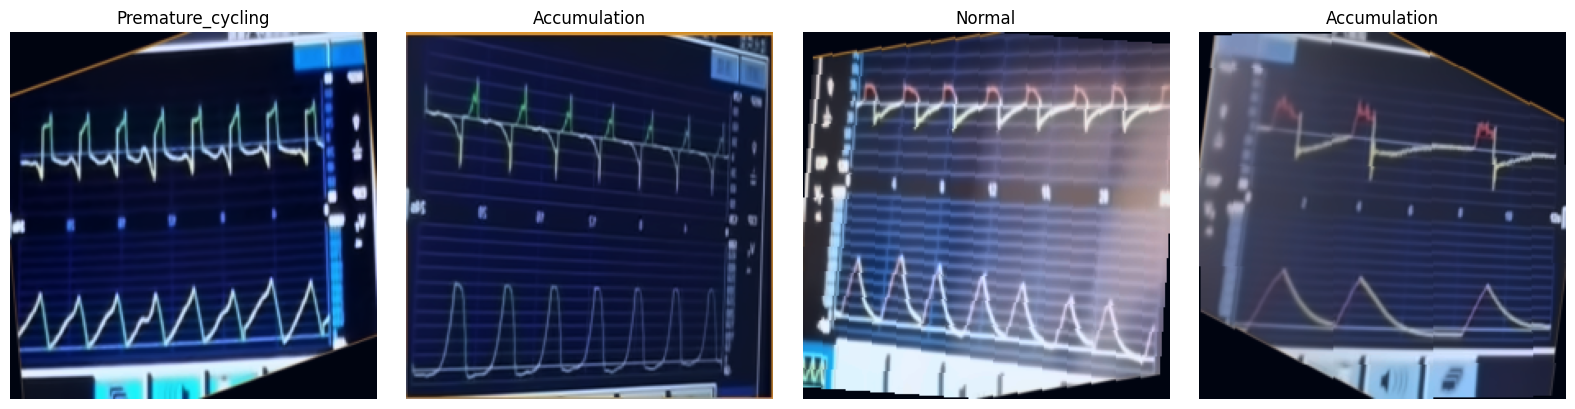

In [75]:
def show_batch(images, labels, classes, n=4):
    imgs = images[:n].clone().detach()
    imgs = imgs.permute(0, 2, 3, 1)  # [B,H,W,3]

    plt.figure(figsize=(4 * n, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        img = imgs[i].numpy()
        img = (img - img.min()) / (img.max() - img.min() + 1e-6)
        ax.imshow(img)
        cls_id = int(labels[i].item())
        cls_name = MACRO_LABELS[cls_id]
        ax.set_title(cls_name)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(iter(train_loader))
show_batch(images, labels, MACRO_LABELS, n=4)
